In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
caFile = 'Data/CAvideos.csv'
usFile = 'Data/USvideos.csv'
mxFile = 'Data/MXvideos.csv'
inFile = 'Data/INVideos.csv'
jpFile = 'Data/JPVideos.csv'
krFile = 'Data/KRVideos.csv'


caDF = pd.read_csv(caFile, encoding='ANSI')
usDF = pd.read_csv(usFile, encoding='ANSI')
mxDF = pd.read_csv(mxFile, encoding='ANSI')
inDF = pd.read_csv(inFile, encoding='ANSI')
jpDF = pd.read_csv(jpFile, encoding='ANSI')
krDF = pd.read_csv(krFile, encoding='ANSI')

caDF.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â–¶ \n\nSUBSCRIBE â–º ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ðŸŽ§: https://ad.gt/yt-perfect\nðŸ’°: https://...


In [139]:
allColumns = list(mxDF.columns)
allColumns

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [140]:
# Keeping columns that only pertain to my question, cleaning data

caCleanDF = caDF.loc[:,['video_id', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 
                        'video_error_or_removed']]
usCleanDF = usDF.loc[:,['video_id', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 
                        'video_error_or_removed']]
mxCleanDF = mxDF.loc[:,['video_id', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 
                        'video_error_or_removed']]
inCleanDF = inDF.loc[:,['video_id', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 
                        'video_error_or_removed']]
jpCleanDF = jpDF.loc[:,['video_id', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 
                        'video_error_or_removed']]
krCleanDF = krDF.loc[:,['video_id', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 
                        'video_error_or_removed']]

krCleanDF.head()

,video_id,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,RxGQe4EeEpA,22,156130,1422,40,272,False,False,False
1,hH7wVE8OlQ0,25,76533,211,28,113,False,False,False
2,9V8bnWUmE9U,22,421409,5112,166,459,False,False,False
3,0_8py-t5R80,25,222850,2093,173,1219,False,False,False
4,bk55RbxiQdI,25,84466,1094,109,450,False,False,False


In [141]:
#caSorted = caCleanDF.sort_values('views', ascending= False)
caLikeSum = caCleanDF.groupby('category_id')['likes'].sum()
usLikeSum = usCleanDF.groupby('category_id')['likes'].sum()
mxLikeSum = mxCleanDF.groupby('category_id')['likes'].sum()
inLikeSum = inCleanDF.groupby('category_id')['likes'].sum()
jpLikeSum = jpCleanDF.groupby('category_id')['likes'].sum()
krLikeSum = krCleanDF.groupby('category_id')['likes'].sum()

likeMerge1 = pd.merge(caLikeSum, usLikeSum, on='category_id', how='outer', suffixes=('_ca', '_us')).reset_index()
likeMerge2 = pd.merge(mxLikeSum, inLikeSum, on='category_id', how='outer', suffixes=('_mx', '_in')).reset_index()
likeMerge3 = pd.merge(jpLikeSum, krLikeSum, on='category_id', how='outer', suffixes=('_jp', '_kr')).reset_index()
likeMerge4 = pd.merge(likeMerge1, likeMerge2, on='category_id', how='outer')
likeMerge5 = pd.merge(likeMerge4, likeMerge3, on='category_id', how='outer')

topLikeDF = likeMerge5.sort_values(['likes_ca','likes_us', 'likes_mx','likes_in','likes_jp','likes_kr'], ascending=False)
topLikeDF = topLikeDF.head()
topLikeDF

,category_id,likes_ca,likes_us,likes_mx,likes_in,likes_jp,likes_kr
2,10,564447530.0,1.416839e+09,227013300.0,254328536.0,83596720.0,240239454.0
9,24,387245433.0,5.305165e+08,186692595.0,396146637.0,39741269.0,88234195.0
8,23,196046674.0,2.163467e+08,55273506.0,174114686.0,7547588.0,13110818.0
7,22,105388564.0,1.866160e+08,47859054.0,23194729.0,9696311.0,21330185.0
0,1,77802003.0,1.659975e+08,17915248.0,69241553.0,5920614.0,16492926.0


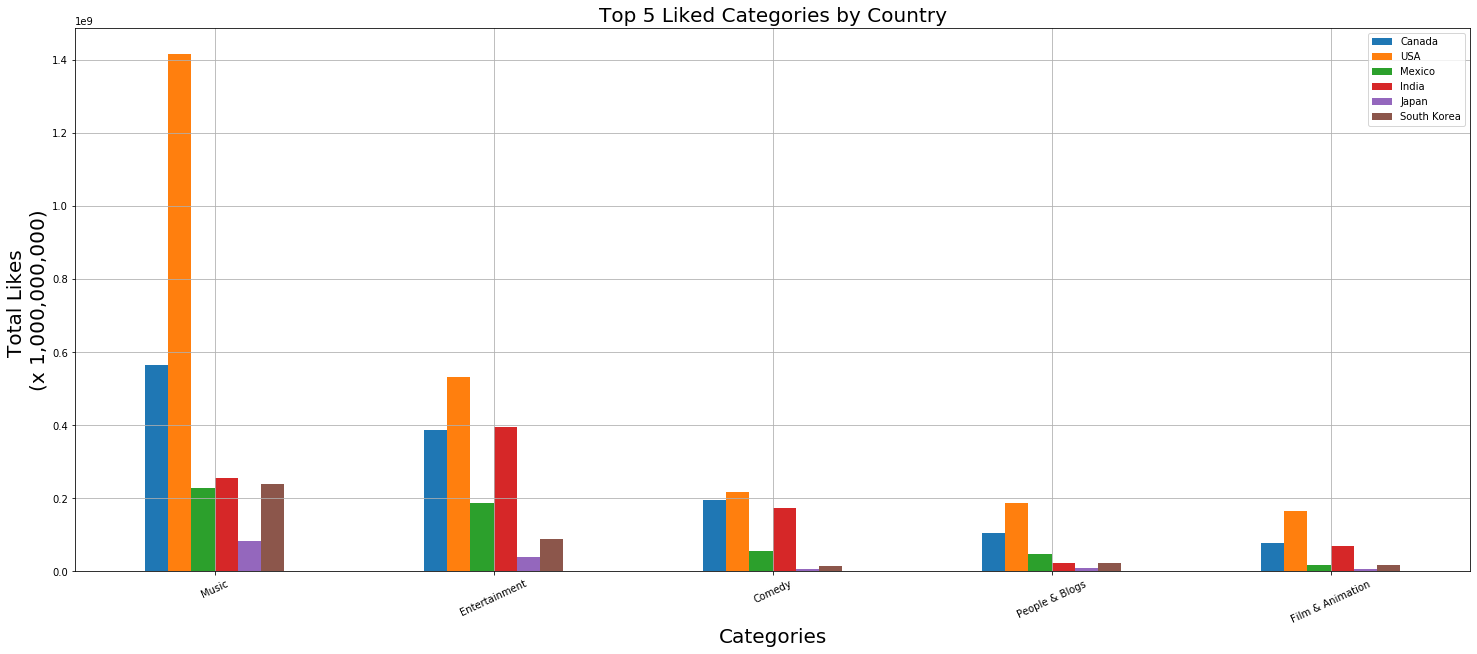

In [143]:
labels = ['Music', 'Entertainment', 'Comedy', 'People & Blogs', 'Film & Animation']
ax = topLikeDF.plot.bar(x='category_id', figsize=(25,10))
ax.set_xlabel('Categories', size=20)
ax.set_ylabel('Total Likes \n(x 1,000,000,000)',size=20)
ax.set_xticklabels(labels, rotation=25)
ax.set_title('Top 5 Liked Categories by Country',size=20)
ax.legend(['Canada', 'USA', 'Mexico','India','Japan','South Korea' ])
ax.grid()
plt.savefig('Fig_1_Top_Likes.png')
plt.show()

In [60]:
#caSorted = caCleanDF.sort_values('views', ascending= False)
caDislikeSum = caCleanDF.groupby('category_id')['dislikes'].sum()
usDislikeSum = usCleanDF.groupby('category_id')['dislikes'].sum()
mxDislikeSum = mxCleanDF.groupby('category_id')['dislikes'].sum()
inDislikeSum = inCleanDF.groupby('category_id')['dislikes'].sum()
jpDislikeSum = jpCleanDF.groupby('category_id')['dislikes'].sum()
krDislikeSum = krCleanDF.groupby('category_id')['dislikes'].sum()

dislikeMerge1 = pd.merge(caDislikeSum, usDislikeSum, on='category_id', how='outer', suffixes=('_ca', '_us')).reset_index()
dislikeMerge2 = pd.merge(mxDislikeSum, inDislikeSum, on='category_id', how='outer', suffixes=('_mx', '_in')).reset_index()
dislikeMerge3 = pd.merge(jpDislikeSum, krDislikeSum, on='category_id', how='outer', suffixes=('_jp', '_kr')).reset_index()
dislikeMerge4 = pd.merge(dislikeMerge1, dislikeMerge2, on='category_id', how='outer')
dislikeMerge5 = pd.merge(dislikeMerge4, dislikeMerge3, on='category_id', how='outer')

topDislikeDF = dislikeMerge5.sort_values(['dislikes_ca','dislikes_us', 'dislikes_mx','dislikes_in','dislikes_jp','dislikes_kr'], ascending=False)
topDislikeDF = topDislikeDF.head()
topDislikeDF

,category_id,dislikes_ca,dislikes_us,dislikes_mx,dislikes_in,dislikes_jp,dislikes_kr
9,24,25791583.0,42987663.0,11139060.0,27428929.0,2638087.0,7861813.0
2,10,22098190.0,51179008.0,7957335.0,15030992.0,1883438.0,6311717.0
7,22,9480796.0,10187901.0,3219558.0,1728388.0,919130.0,998648.0
8,23,5372515.0,7230391.0,2400688.0,6976508.0,446926.0,534884.0
4,17,3286369.0,5133551.0,1279451.0,1316379.0,378340.0,221186.0


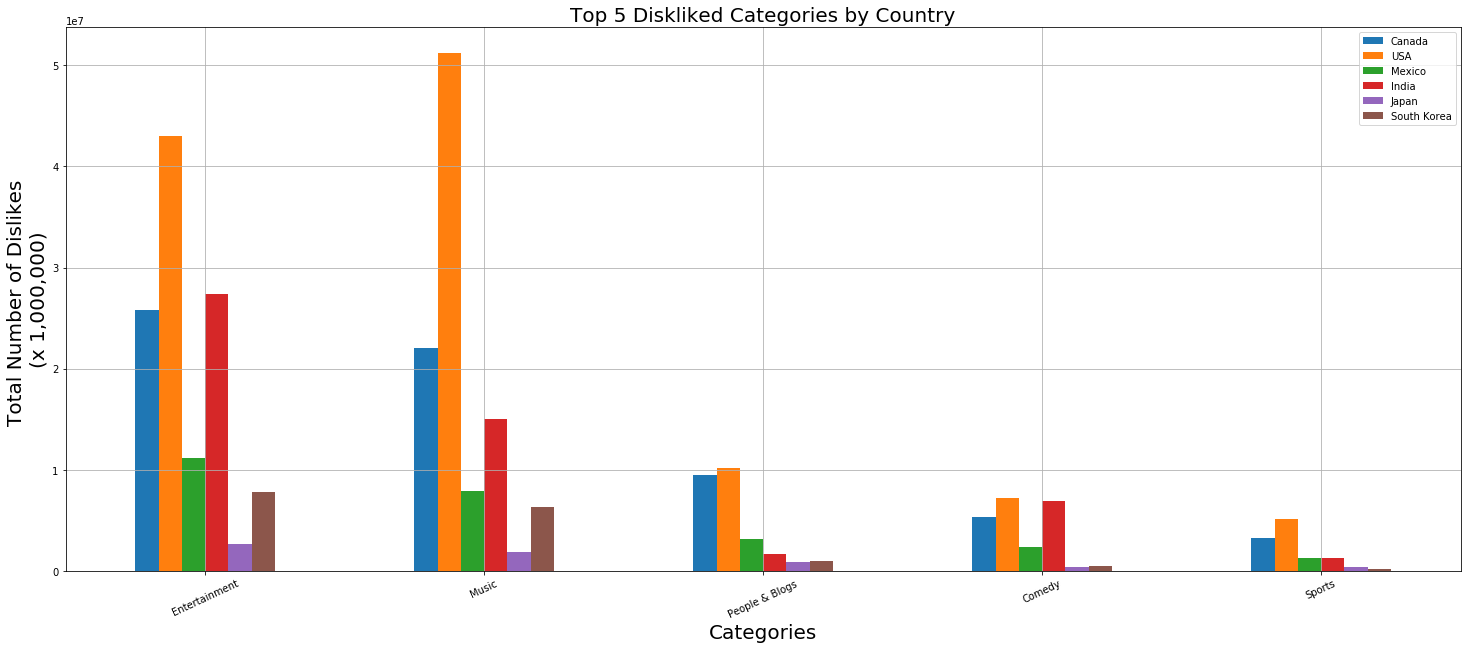

In [144]:
labels = ['Entertainment', 'Music', 'People & Blogs', 'Comedy', 'Sports']
ax=topDislikeDF.plot.bar(x='category_id',figsize=(25,10))
ax.set_xlabel('Categories', size=20)
ax.set_ylabel('Total Number of Dislikes \n(x 1,000,000)', size=20)
ax.set_xticklabels(labels, rotation=25)
ax.set_title('Top 5 Diskliked Categories by Country', size=20)
ax.legend(['Canada', 'USA', 'Mexico','India','Japan','South Korea' ])
ax.grid()
plt.savefig('Fig_2_Top_Dislikes.png')
plt.show()

In [145]:
#caSorted = caCleanDF.sort_values('views', ascending= False)
caCommentCount = caCleanDF.groupby('category_id')['comment_count'].sum()
usCommentCount = usCleanDF.groupby('category_id')['comment_count'].sum()
mxCommentCount = mxCleanDF.groupby('category_id')['comment_count'].sum()
inCommentCount = inCleanDF.groupby('category_id')['comment_count'].sum()
jpCommentCount = jpCleanDF.groupby('category_id')['comment_count'].sum()
krCommentCount = krCleanDF.groupby('category_id')['comment_count'].sum()

comCountMerge1 = pd.merge(caCommentCount, usCommentCount, on='category_id', how='outer', suffixes=('_ca', '_us')).reset_index()
comCountMerge2 = pd.merge(mxCommentCount, inCommentCount, on='category_id', how='outer', suffixes=('_mx', '_in')).reset_index()
comCountMerge3 = pd.merge(jpCommentCount, krCommentCount, on='category_id', how='outer', suffixes=('_jp', '_kr')).reset_index()
comCountMerge4 = pd.merge(comCountMerge1, comCountMerge2, on='category_id', how='outer')
comCountMerge5 = pd.merge(comCountMerge4, comCountMerge3, on='category_id', how='outer')

topComCountDF = comCountMerge5.sort_values(['comment_count_ca','comment_count_us', 'comment_count_mx','comment_count_in','comment_count_jp','comment_count_kr'], ascending=False)
topComCountDF = topComCountDF.head()
topComCountDF

,category_id,comment_count_ca,comment_count_us,comment_count_mx,comment_count_in,comment_count_jp,comment_count_kr
9,24,55313036.0,73566498.0,29688886.0,42199473.0,6052118.0,17324199.0
2,10,52435252.0,125296396.0,21744565.0,17595070.0,11129839.0,30550411.0
8,23,19638776.0,22545582.0,6838587.0,13806968.0,1229425.0,3028270.0
7,22,16818201.0,24778032.0,7304854.0,2661920.0,1669164.0,4225475.0
0,1,10086573.0,17887060.0,2048173.0,5789446.0,881008.0,2737433.0


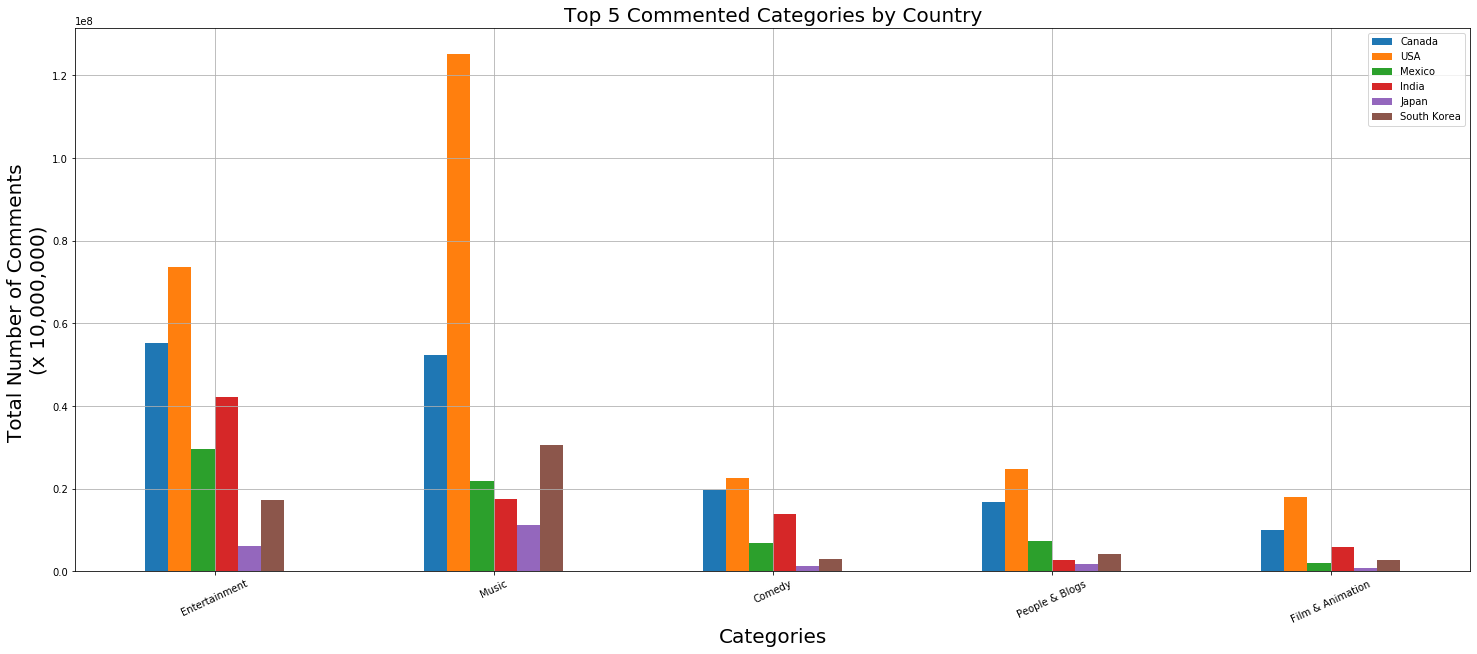

In [146]:
labels = ['Entertainment', 'Music', 'Comedy', 'People & Blogs', 'Film & Animation']
ax = topComCountDF.plot.bar(x='category_id',figsize=(25,10))
ax.set_xlabel('Categories', size = 20)
ax.set_ylabel('Total Number of Comments \n(x 10,000,000)', size=20)
ax.set_xticklabels(labels, rotation=25)
ax.set_title('Top 5 Commented Categories by Country', size=20)
ax.legend(['Canada', 'USA', 'Mexico','India','Japan','South Korea' ])
ax.grid()
plt.savefig('Fig_3_Most_Comments.png')
plt.show()